
## Background

__Twitter__ has become a wildly sprawling jungle of information&mdash;140 characters at a time. Somewhere between 350 million and 500 million tweets are estimated to be sent out _per day_. With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever to tame it in some way, to concisely capture the essence of the data.

Choose __one__ of the following two assignments, in which you will do just that. Good luck!

## News Mood

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: __BBC, CBS, CNN, Fox, and New York times__.

![output_10_0.png](output_10_0.png)

![output_13_1.png](output_13_1.png)

The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last __100__ tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
* Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot

In [2]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [5]:
consumer_key = "t7LIdpsTRIICgn94d42XbXLIR"
consumer_secret = "EKV4U8X8yECnUcc0qrgtnpKB0UOx2BuHptEBqhpaRBS0M5ZH4R"
access_token = "975053700614930432-6AgW7uOwmRWA9CA4Mvy4Ty8cgZGUUiM"
access_token_secret = "kq3G34KXjiFsALLHkt0PWKggEfP0v5fBa5I4C4zP2d6Lj"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [15]:
# Target Search 
target_terms = ["@CNN", "@BBC", "@CBSNews", "@FoxNews","@nytimes"]


#dictonary af lists to store sentiments
tweet_data = {'Source':[],
               'Text':[], 
               'Compound':[],
               'Negative':[], 
               'Neutral':[],
               'Positive':[],
            'Date':[]}

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    for i in target_terms:
        public_tweets = api.user_timeline(i, page=x)
        # Loop through all tweets
        for tweet in public_tweets:

            # 

            #Run Vader Analysis and Append sentiment score 
            score = analyzer.polarity_scores(tweet["text"])
            tweet_data['Compound'].append(score['compound'])
            tweet_data['Negative'].append(score['neg'])
            tweet_data['Neutral'].append(score['neu'])
            tweet_data['Positive'].append(score['pos'])
            tweet_data['Source'].append(tweet['user']['name'])
            tweet_data['Text'].append(tweet['text'])
            tweet_data['Date'].append(tweet['created_at'])


        

In [16]:
tweet_data

{'Compound': [-0.6249,
  0.0,
  0.0,
  0.3612,
  0.4767,
  0.0,
  0.3182,
  0.0,
  0.6808,
  0.3612,
  -0.6705,
  0.6486,
  0.25,
  0.4404,
  0.0,
  0.5719,
  0.4588,
  -0.296,
  0.34,
  0.296,
  0.0,
  0.296,
  -0.8225,
  0.0,
  0.7506,
  0.0,
  -0.3182,
  0.0,
  0.0,
  0.0,
  -0.34,
  0.0,
  0.0,
  0.3182,
  0.0,
  0.0,
  -0.3612,
  0.0,
  0.0,
  -0.7351,
  -0.6808,
  -0.802,
  0.0516,
  0.6249,
  -0.2263,
  0.2732,
  0.0,
  -0.2732,
  0.0,
  -0.4019,
  0.3818,
  0.6124,
  -0.1531,
  0.0258,
  -0.296,
  0.1027,
  0.0,
  -0.2732,
  0.0,
  -0.5563,
  0.4939,
  0.0,
  -0.0516,
  -0.0516,
  -0.6124,
  0.3182,
  0.0,
  0.0,
  -0.7096,
  -0.6486,
  -0.7269,
  -0.4215,
  -0.7184,
  0.0,
  -0.34,
  -0.5574,
  0.0,
  -0.7269,
  0.0,
  -0.6249,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.6705,
  -0.296,
  -0.438,
  0.4588,
  0.0,
  0.0,
  0.5563,
  0.4404,
  0.6531,
  -0.7096,
  -0.8074,
  0.296,
  0.296,
  -0.7003,
  0.0,
  0.0,
  -0.6249,
  0.0,
  0.0,
  0.3612,
  0.4767,
  0.0,
  0.3182,
  0.0,
  0.68

In [25]:
# Create dataframe
news_sentiment_df = pd.DataFrame(tweet_data)

news_sentiment_df = news_sentiment_df[['Date',
                                       'Source',
                                       'Text',
                                       'Positive',
                                       'Neutral',
                                       'Negative',
                                       'Compound'
                                      ]]
news_sentiment_df.head()

,Date,Source,Text,Positive,Neutral,Negative,Compound
0,Wed Mar 28 21:26:53 +0000 2018,CNN,Former Vice President Joe Biden regrets saying...,0.000,0.788,0.212,-0.6249
1,Wed Mar 28 21:23:39 +0000 2018,CNN,"RT @CNNnewsroom: ""There's this power of nostal...",0.000,1.000,0.000,0.0000
2,Wed Mar 28 21:20:38 +0000 2018,CNN,"News that Cambridge Analytica, a data firm wit...",0.000,1.000,0.000,0.0000
3,Wed Mar 28 21:11:01 +0000 2018,CNN,TESS the planet hunter is getting ready to lau...,0.116,0.884,0.000,0.3612
4,Wed Mar 28 21:02:45 +0000 2018,CNN,"Sen. Kennedy on what he'd ask Zuckerberg: ""Is ...",0.163,0.837,0.000,0.4767


In [26]:
news_sentiment_df['Date'] = pd.to_datetime(news_sentiment_df['Date'])
news_sentiment_df.head()

,Date,Source,Text,Positive,Neutral,Negative,Compound
0,2018-03-28 21:26:53,CNN,Former Vice President Joe Biden regrets saying...,0.000,0.788,0.212,-0.6249
1,2018-03-28 21:23:39,CNN,"RT @CNNnewsroom: ""There's this power of nostal...",0.000,1.000,0.000,0.0000
2,2018-03-28 21:20:38,CNN,"News that Cambridge Analytica, a data firm wit...",0.000,1.000,0.000,0.0000
3,2018-03-28 21:11:01,CNN,TESS the planet hunter is getting ready to lau...,0.116,0.884,0.000,0.3612
4,2018-03-28 21:02:45,CNN,"Sen. Kennedy on what he'd ask Zuckerberg: ""Is ...",0.163,0.837,0.000,0.4767


In [27]:
# Create csv
news_sentiment_df.to_csv('news_sentiment.csv', sep=',')

In [37]:
#separate sentiments into different news outlets
BBC = news_sentiment_df[news_sentiment_df['Source']=='BBC']
CBS = news_sentiment_df[news_sentiment_df['Source']=='CBS News']
CNN = news_sentiment_df[news_sentiment_df['Source']=='CNN']
NYT = news_sentiment_df[news_sentiment_df['Source']=='The New York Times']
FOX = news_sentiment_df[news_sentiment_df['Source']=='Fox News']

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
news_sentiment_df['Source'].unique()

array(['CNN', 'BBC', 'CBS News', 'Fox News', 'The New York Times'], dtype=object)

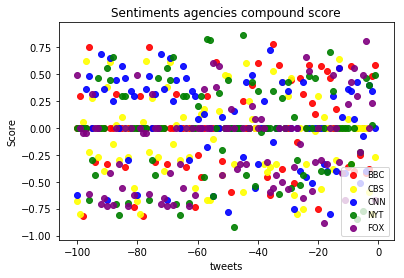

In [52]:
#Create scatter plot
plt.scatter(np.arange(-len(BBC), 0, 1),BBC['Compound'], c = 'red', marker='o', alpha=0.9, label='BBC')
plt.scatter(np.arange(-len(CBS), 0, 1),CBS['Compound'], c = 'yellow', marker='o', alpha=0.9, label='CBS')
plt.scatter(np.arange(-len(CNN), 0, 1),CNN['Compound'], c = 'blue', marker='o', alpha=0.9, label='CNN')
plt.scatter(np.arange(-len(NYT), 0, 1),NYT['Compound'], c = 'green', marker='o', alpha=0.9, label='NYT')
plt.scatter(np.arange(-len(FOX), 0, 1),FOX['Compound'], c = 'purple', marker='o', alpha=0.9, label = 'FOX')

plt.title("Sentiments agencies compound score")
plt.xlabel("tweets")
plt.ylabel("Score")

plt.legend(loc='lower right', fontsize="small", fancybox=True)
plt.savefig('last 100 tweets.png')

In [42]:
#Calculate mean
BBC_mean = BBC['Compound'].mean()
CBS_mean = CBS['Compound'].mean()
CNN_mean = CNN['Compound'].mean()
NYT_mean = NYT['Compound'].mean()
FOX_mean = FOX['Compound'].mean()

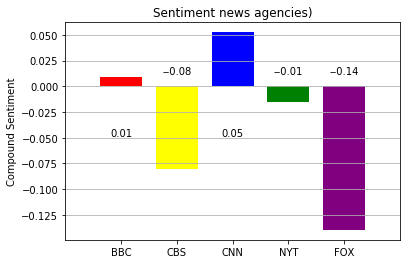

In [59]:
# Managing graph, mean of compound and value for axis
compound_list = [BBC_mean, CBS_mean, CNN_mean, NYT_mean, FOX_mean]
x_axis = np.arange(len(compound_list))

fig, ax = plt.subplots()
ind = x_axis

#Set graph parameters
ax.set_xticks(ind)
ax.set_title('Sentiment news agencies)')
ax.set_ylabel('Compound Sentiment')
ax.set_xticklabels(('BBC', 'CBS', 'CNN', 'NYT', 'FOX'))
ax.set_xlim(-1, 5)



ax.set_autoscaley_on(True)

width = 0.75
#height = 1
ax.yaxis.grid(True, which='major')

#Create each bar. ind = each thing on the compound_list & is separated by news outlet
#Using same colors as scatter plot

BBC_bar = ax.bar(ind[0],BBC_mean,width, color = 'red')
CBS_bar = ax.bar(ind[1],CBS_mean,width, color = 'yellow')
CNN_bar = ax.bar(ind[2],CNN_mean,width, color = 'blue')
NYT_bar = ax.bar(ind[3],NYT_mean,width, color = 'green')
FOX_bar = ax.bar(ind[4],FOX_mean,width, color = 'purple')

# Label with polarity.

def label_pos(rect_pos):
    for rect in rect_pos:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.0, -0.05,
         '%0.2f' % float(height),
           ha='center', va='bottom', color='black')

def label_neg(rect_neg):
    for rect in rect_neg:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.0, 0.01,
         '-%0.2f' % float(height),
           ha='center', va='bottom', color='black')




#Labels
label_pos(BBC_bar)
label_neg(CBS_bar)
label_pos(CNN_bar)
label_neg(NYT_bar)
label_neg(FOX_bar)

#Save plot as png
plt.savefig('sentiment news agencies.png')